<a href="https://colab.research.google.com/github/supritat/EIP4/blob/master/session_2/Second_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


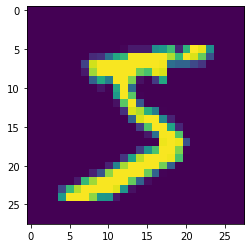

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [67]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', bias=False, input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 22
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu', bias=False)) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu', bias=False)) #7
model.add(BatchNormalization())

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipy

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 16)        2304      
_________________________________________________________________
batch_normalization_31 (Batc (None, 22, 22, 16)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, activation="relu", use_bias=False)`


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [99]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test),)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 2560/60000 [>.............................] - ETA: 4s - loss: 6.1790e-04 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 53us/step - loss: 0.0024 - acc: 0.9991 - val_loss: 0.0335 - val_acc: 0.9927
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0037 - acc: 0.9987 - val_loss: 0.0319 - val_acc: 0.9935
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0351 - val_acc: 0.9935
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0029 - acc: 0.9988 - val_loss: 0.0293 - val_acc: 0.9938
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.0323 - val_acc: 0.9934
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0035 - acc: 0.9987 - val_loss: 0.0293 - val_acc: 0.9939
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.0305 - val_acc: 0.9932
Epoch 8/20
60000/60000 [============================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [101]:
print(score)

[0.0362217591198546, 0.993]


In [0]:
y_pred = model.predict(X_test)

In [103]:
print(y_pred[:9])
print(y_test[:9])

[[7.5480429e-18 4.0751425e-18 1.4152696e-16 7.9362217e-16 9.3307011e-16
  5.7716669e-21 6.8854344e-24 1.0000000e+00 3.4410564e-23 1.5014469e-15]
 [8.1605908e-13 1.2370241e-13 1.0000000e+00 1.0554949e-20 6.0449907e-20
  1.3414177e-24 3.9377962e-14 5.1105615e-23 6.5798754e-19 2.4485010e-25]
 [4.9685043e-15 1.0000000e+00 1.8641088e-16 8.0491252e-23 3.9840941e-13
  3.7385108e-15 7.2324763e-13 3.2115104e-13 5.0625169e-16 3.3938122e-16]
 [1.0000000e+00 1.5202899e-27 3.1347873e-18 5.8518939e-23 5.2890383e-18
  5.2987288e-19 5.1625659e-15 8.1659331e-24 4.4616220e-18 1.5989475e-14]
 [6.6485546e-19 2.1148716e-20 1.5992765e-22 1.1481267e-27 1.0000000e+00
  5.2293006e-23 5.9516107e-13 4.7170582e-23 9.3129784e-19 2.3757565e-12]
 [7.9540999e-17 1.0000000e+00 1.2218697e-15 1.1624658e-22 1.1404007e-12
  6.9943163e-17 1.0879595e-13 5.1740287e-12 7.4059440e-19 8.6135040e-16]
 [2.1606418e-29 3.4247128e-16 4.5953549e-25 1.3721897e-27 1.0000000e+00
  4.5754387e-22 2.0606948e-19 1.1176160e-16 1.7505339e-16 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

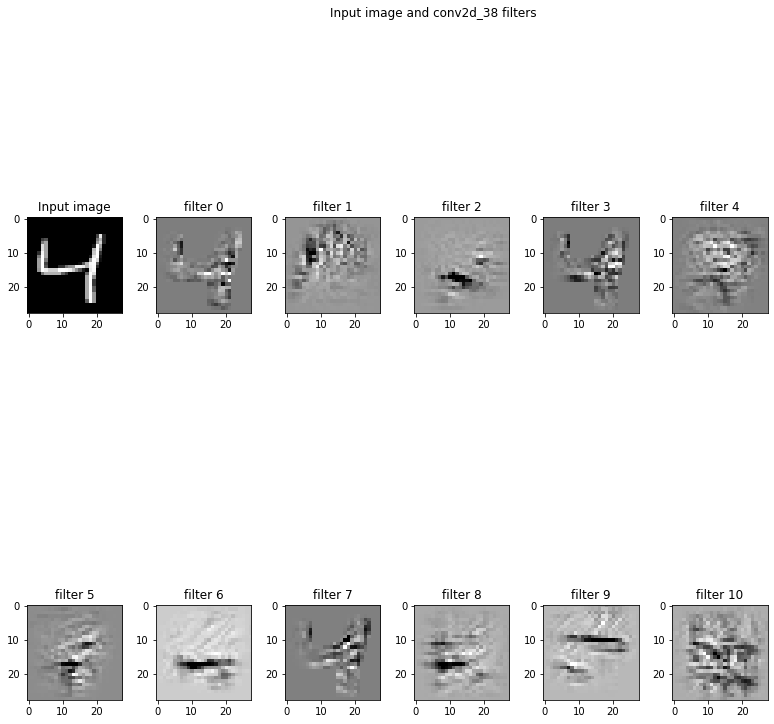

In [106]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_38'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()